In [20]:
# Load the data
import csv
import numpy as np
from pprint import pprint
import os

path = os.listdir("./data")[0]
with open(f"./data/{path}") as fin:
    reader = csv.reader(fin, delimiter=",")
    raw_data = list(reader)

    def convert(raw_data):
        return -1 if raw_data == "" else int(raw_data)

    data = []
    for row in raw_data[1:]:
        data.append([])
        for col in range(3, len(raw_data[0]) - 2):
            data[-1].append(convert(row[col]))
    
    mat = np.array(data).T

print(mat, mat.shape)
print(np.sum(mat == -1))

[[-1  7  5  7  1  4  3  3 -1  7  7  4  2  3  5  5 -1  7  3  5  3  1  6  6
   7  5  5  3  6  6  4  5  5  6  1  7  3  1  5 -1 -1  5  3  5  5  6 -1  7
   1  3  4  2  1  6  4  5  6  6  4  4  5  3  4  2  3]
 [-1  5  2 -1  4  4  5  7  2 -1  7  1  1 -1  1  2 -1  4  3  2  4  5  4  2
   4  1  2  2  2  5  1  6  3 -1  1  5 -1  4  5 -1  4  3  4  1  6  7 -1  5
   1  4  5  1  5  2  1  4  1  5  6  2  5  1  1  2  6]
 [-1 -1 -1 -1 -1 -1  1  7  3 -1 -1  1  1 -1 -1  6 -1  4 -1  1 -1 -1 -1 -1
  -1 -1  1  2  5 -1  4 -1 -1 -1  1 -1  1  1 -1 -1 -1  4  1  4  4  5 -1 -1
   1  1  4 -1  5 -1  3  6 -1 -1  5 -1 -1  1  1 -1 -1]
 [ 6  2  7  7  7  6  7  3  6  7  7  7  5  7  6  6  7  5  6  7  6  6  3  6
   7  6  7  6  6  7  7  6  6  7  6  7  6  6  6  5  5  6  4  7  6  7  7  6
   5  5  7  7  7  5  4  7  2  6  6  5  7  6  6  6  6]
 [ 5  1  7  4  7  3  3  3  4  6  6  7  7  4  6  7  3  6  5  5  5  5  4  5
   6  7  7  5  7  7  7  3  2  7  3  4  4  1  6  7  5  5  4  6  7  7  7  4
   3  6  5  6  3  4  4  5  5  4  7  6  5  7 

In [2]:
# Get food labels
import re

pattern = r".*?\[(.*)].*"
food_labels = [re.findall(pattern, header)[0] for header in raw_data[0][3:-2]]

In [16]:
import numpy as np
def test():
    M = [[3, 10, 2, 9, 3, -1, -1, 4],
         [3, -1, -1, 4, 9, 2, 3, 1],
         [4, -1, 2, 4, 3, 5, 1, -1],
         [-1, -1, -1, 8, 0, 2, -1, 1],
         [1, 1, -1, 1, 2, 2, -1, -1],
         [4, 4, 4, -1, -1, 10, 10, 10]]
    M = np.array(M, dtype="float")
    return matrixComplete(M, -1, 100000)
    
def matrixComplete(M, missingLabel, steps=1000):
    missing = (M == missingLabel)
    predictions = np.where(missing, np.random.random(size=M.shape), 0)
    rate = 0.01 # totally unused but good for experiments I think
    i = 0
    while True:
        i += 1
        predictedMatrix = np.where(missing, predictions, M)
        if i == steps: return predictedMatrix
        u,s,vT = np.linalg.svd(predictedMatrix)
        if i%(steps//20)==0: print(np.sum(np.abs(s)), rate)
        diag = np.zeros((u.shape[0], vT.shape[0]))
        for j in range(min(diag.shape)): diag[j,j] = 1.0
        derivative = np.where(missing, u @ diag @ vT, 0)
        predictions -= 0.1*derivative
        
        while NuclearNorm(predictedMatrix - rate*derivative) >\
           NuclearNorm(predictedMatrix):
            rate /= 1.1
        else:
            rate *= 1.05

def NuclearNorm(M):
    u,s,v = np.linalg.svd(M)
    return np.sum(np.abs(s))

In [21]:
# Clean up the data a little
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

mean = np.nanmean(mat)
n_foods, n_people = mat.shape

print(f"Mean of nonzero entries: {mean}")
print(f"Count of nonzero entries: {np.count_nonzero(~np.isnan(data))}")

print("Number of entries to fill", np.sum(mat == -1))
mat = matrixComplete(mat, -1, 1000)

# Normalize
# Standardize features?
def fit_rows(mat):
    return StandardScaler().fit_transform(mat)

def fit_cols(mat):
    return StandardScaler().fit_transform(mat.T).T

for i in range(10):
    mat = fit_rows(mat)
    mat = fit_cols(mat)

np.set_printoptions(threshold=np.inf)

# for row in mat.T[:10]:
#     print(np.mean(row), np.var(row))

Mean of nonzero entries: 3.9033846153846152
Count of nonzero entries: 3250
Number of entries to fill 325
781.8380263483248 0.10921333129289235
761.3589559750345 1.2523929318695617
748.182879892626 14.361690438600458
739.7470255414731 32.58328500765888
734.2946636770861 34.4859895107709
730.7265150210568 33.18163877464534
728.3773666868285 35.11928421163286
726.8295858093371 37.17007866651479
725.8080298968905 39.340629488606005
725.1302830610691 41.63792986410945
724.6770714098099 44.069381347103935
724.3712971579182 46.642817706230566
724.1632095916985 44.87866378537265
724.0204972713165 47.49935828127772
723.9219560495613 50.273088519817925
723.8535146917509 48.3716282181598
723.8057374065216 51.196294755371085
723.7736218711348 0.11049988347497118
723.7489356884289 0.14151256891660496


In [22]:
# Let's do some PCA!
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
pca_3d = PCA(n_components=3)

pc_2 = pca_2d.fit_transform(mat)
pc_3 = pca_3d.fit_transform(mat)

8

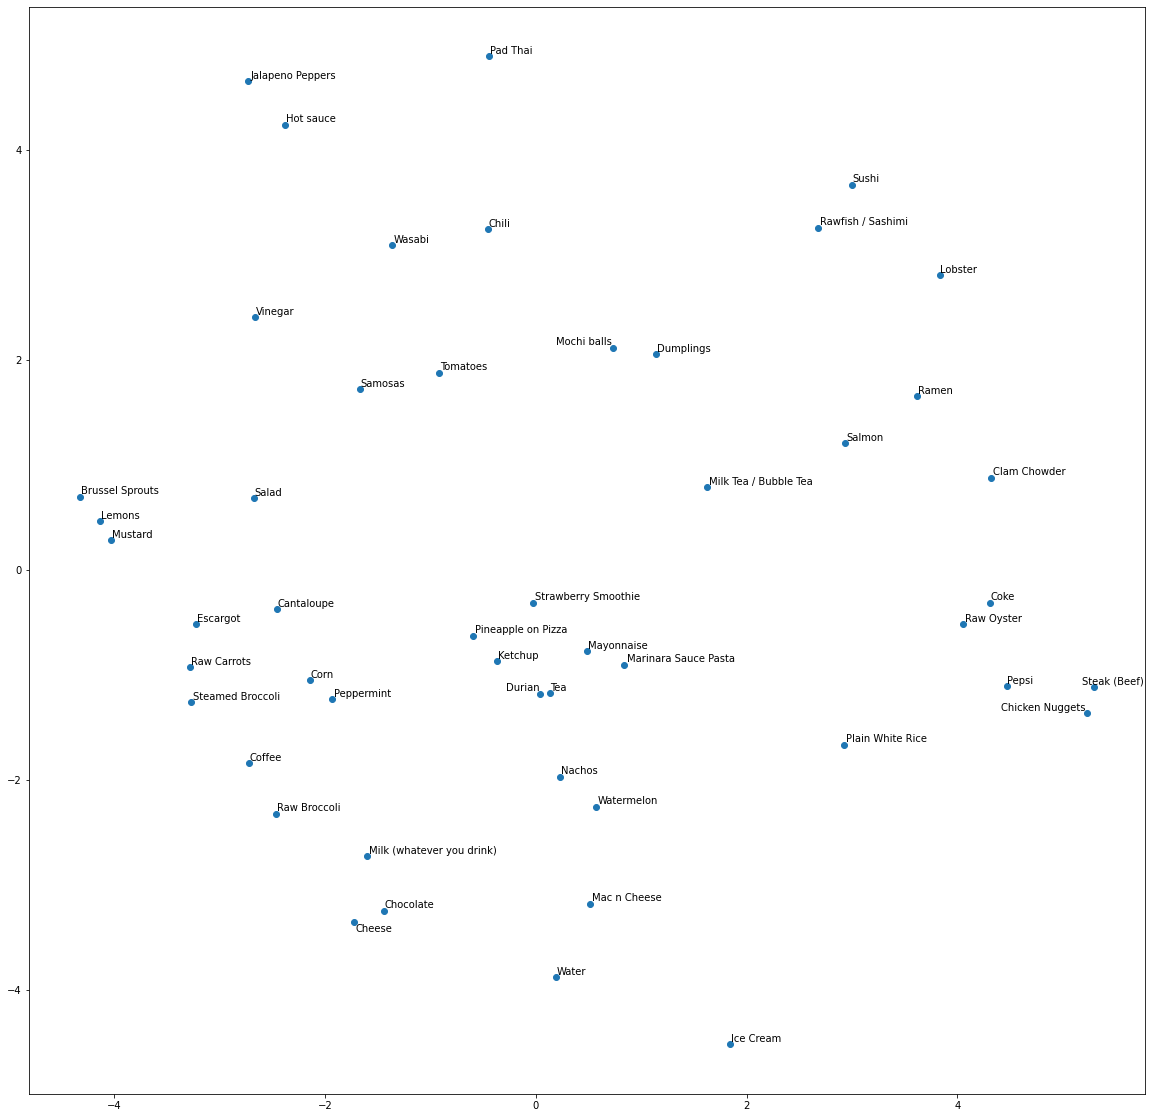

In [23]:
from matplotlib import pyplot as plt
from adjustText import adjust_text

fig = plt.figure(figsize=(20, 20))

#plot_3d = fig.add_subplot(2, 2, 1, projection="3d")
#plot_3d.scatter(*pc_3.T)

plot_2d = fig.add_subplot()
plot_2d.scatter(*pc_2.T)

labels = []
for food, coords in zip(food_labels, pc_2):
    labels.append(plt.text(coords[0], coords[1], food, ha="left", va="top"))

adjust_text(labels)

# Let's find cool correlations

In [ ]:
def correlation(food1, food2):
    idx_1 = food_labels.index(food1)
    idx_2 = food_labels.index(food2)

    x = mat[idx_1]
    y = mat[idx_2]

    plt.scatter(x, y)
    plt.xlabel(food1)
    plt.ylabel(food2)

    #calculate equation for trendline
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)

    #add trendline to plot
    plt.plot(x, p(x), 'g')


correlation("Chocolate", "Water")